In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Dataset ---

In [2]:
# Read the data that is inside of the CSV
df = pd.read_csv("./Health_Data/cleaned_health.csv")
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,1,0,0,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,120,211,0,0,115,0,1.5,1,0,2,1,0,0,1,0
298,44,0,108,141,0,1,175,0,0.6,1,0,2,1,0,0,1,0
299,52,1,128,255,0,1,161,1,0.0,2,1,3,0,1,0,0,0
300,59,1,160,273,0,0,125,0,0.0,2,0,2,0,0,0,0,1


In [3]:
# Define numerical and categorical columns based on your provided list
# 'cp_0', 'cp_1', 'cp_2', 'cp_3' are one-hot encoded versions of 'cp'
# 'target' is the binary outcome variable
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
CATEGORICAL_COLS = [
    'sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
    'cp_0', 'cp_1', 'cp_2', 'cp_3' # Exclude target from general categorical for specific analysis
]
TARGET_COL = 'target' # The column indicating disease presence (0 or 1)

# --- 2. Data Cleaning (Basic - assuming previous cleaning script was run) ---

In [4]:
# It's good practice to ensure data types are correct before plotting.
# This section can be expanded if you haven't run a dedicated cleaning script.

# Convert numerical columns to numeric, coercing errors
for col in NUMERICAL_COLS:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns to appropriate types (e.g., int or category)
# Handle '?' or other non-numeric values if they exist, converting to NaN first
df.replace('?', np.nan, inplace=True)
df.replace('N/A', np.nan, inplace=True)

for col in CATEGORICAL_COLS + [TARGET_COL]:
    if col in df.columns:
        # Attempt to convert to numeric, then to Int64 (nullable integer)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        # Fill any NaNs introduced by coercion for categorical columns with mode
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled new NaNs in '{col}' with mode ({mode_val}) after coercion for EDA.")


print("\nData types after basic type conversion for EDA:")
print(df.dtypes)
print("\nMissing values after basic type conversion for EDA:")
print(df.isnull().sum())


Data types after basic type conversion for EDA:
age           int64
sex           Int64
trestbps      int64
chol          int64
fbs           Int64
restecg       Int64
thalach       int64
exang         Int64
oldpeak     float64
slope         Int64
ca            Int64
thal          Int64
target        Int64
cp_0          Int64
cp_1          Int64
cp_2          Int64
cp_3          Int64
dtype: object

Missing values after basic type conversion for EDA:
age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
dtype: int64


# --- 3. Exploratory Data Analysis (EDA) ---

In [5]:
# Set a style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# --- 3.1. Distribution of Numerical Features ---


--- Plotting Distributions of Numerical Features ---


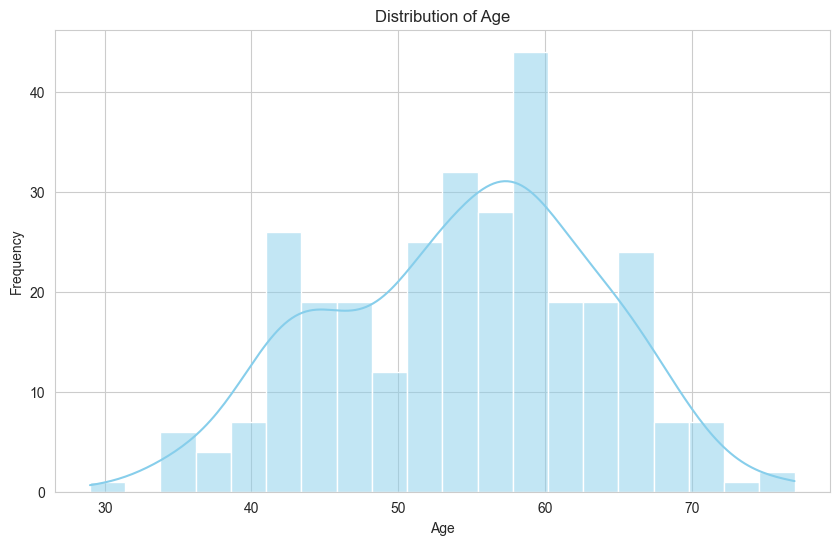

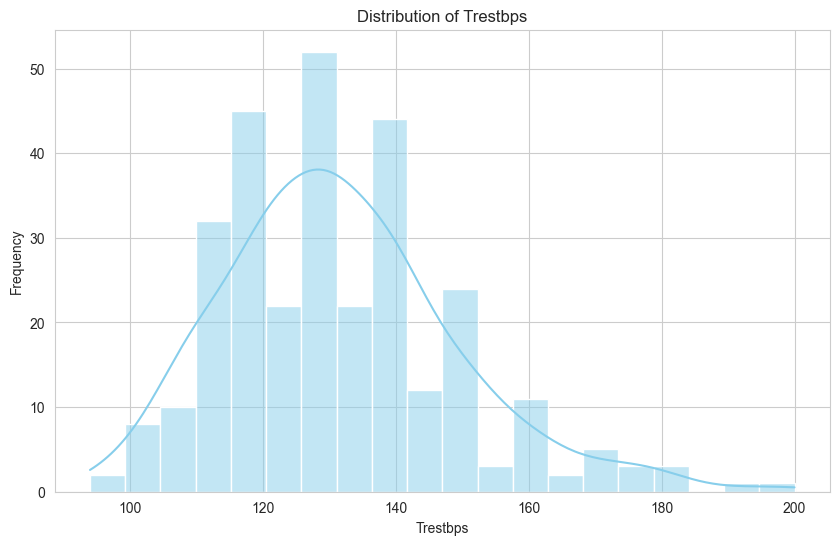

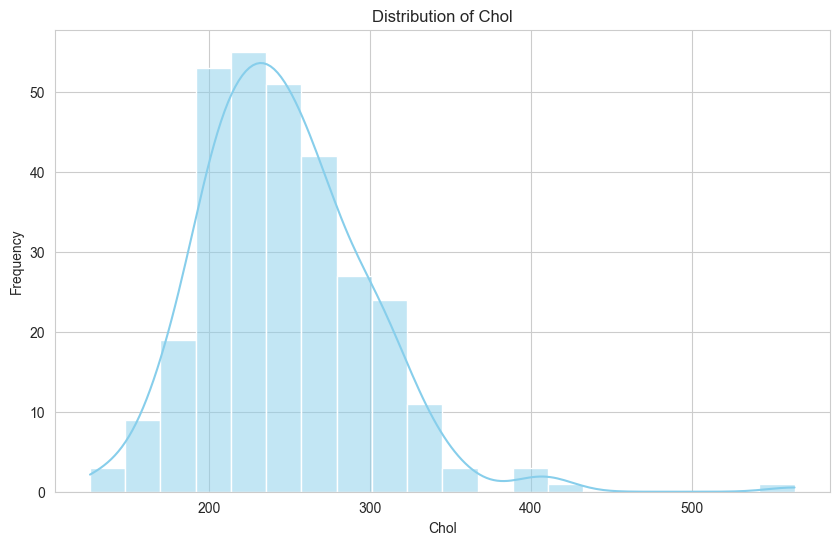

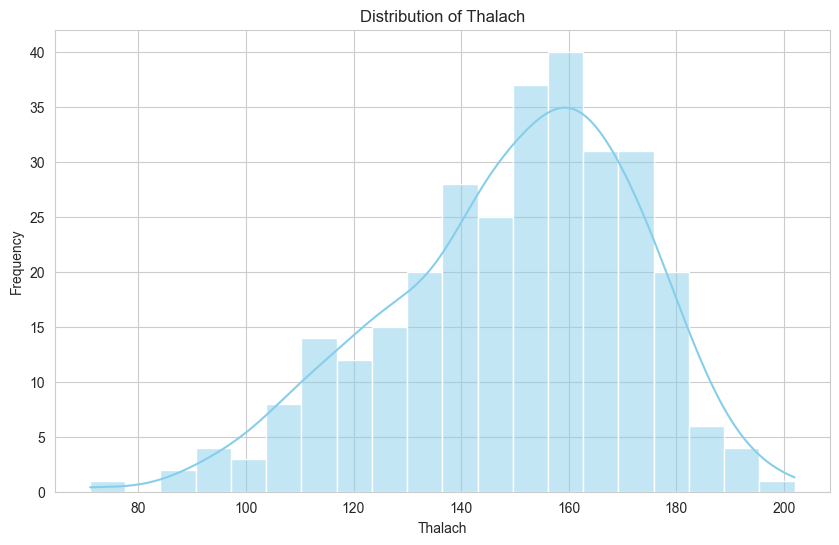

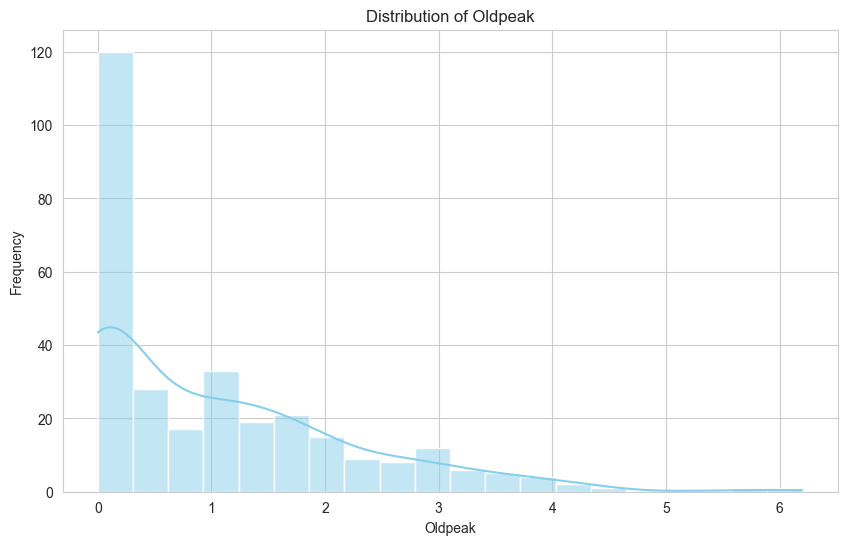

In [6]:
print("\n--- Plotting Distributions of Numerical Features ---")
for col in NUMERICAL_COLS:
    if col in df.columns:
        plt.figure() # Create a new figure for each plot
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')
        plt.show()

# --- 3.2. Distribution of Categorical Features ---


--- Plotting Distributions of Categorical Features ---


C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


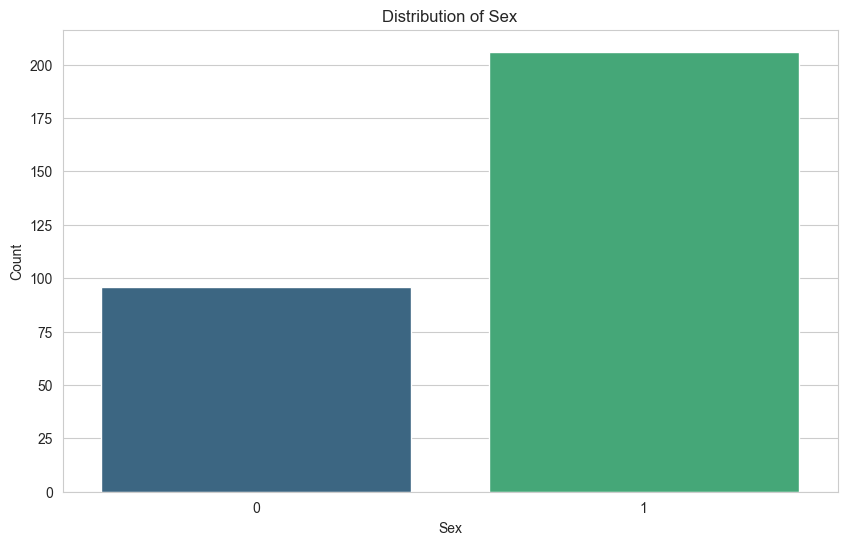

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


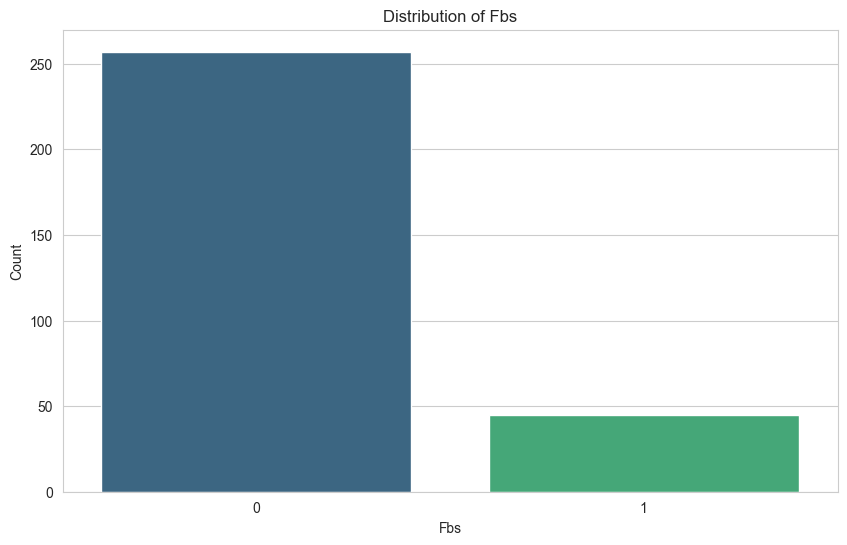

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


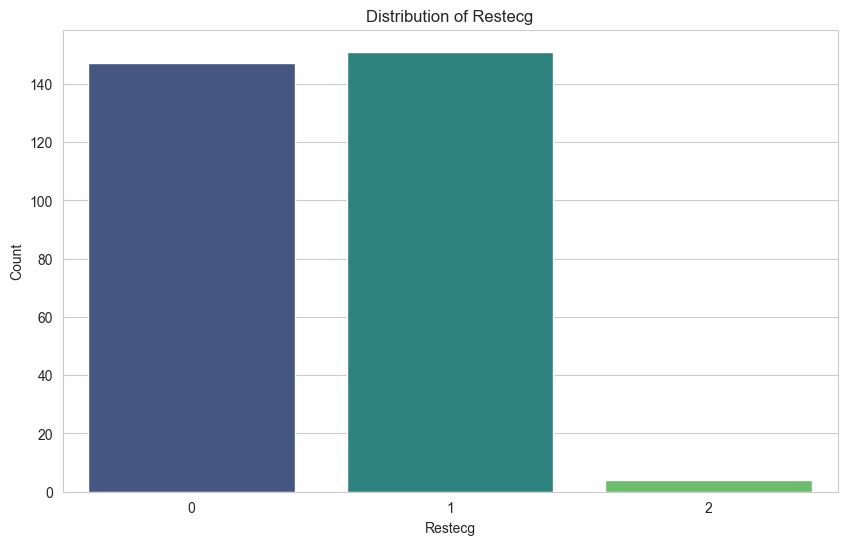

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


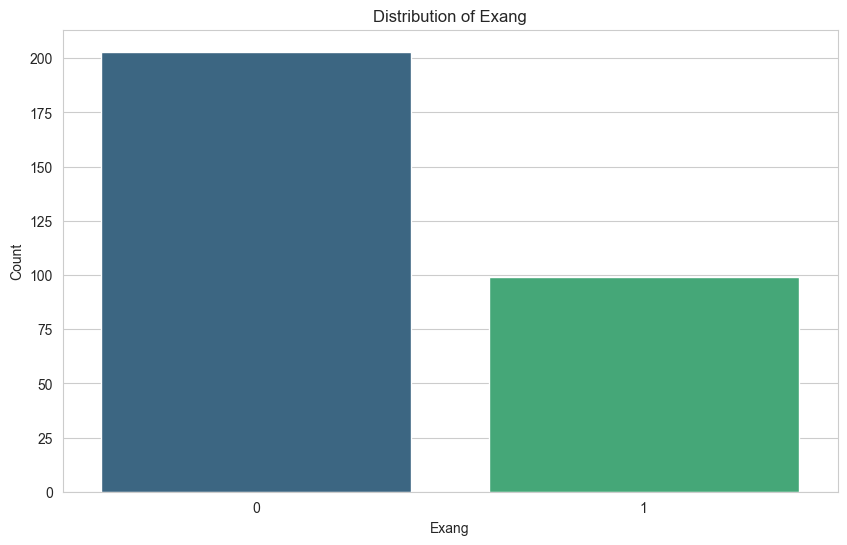

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


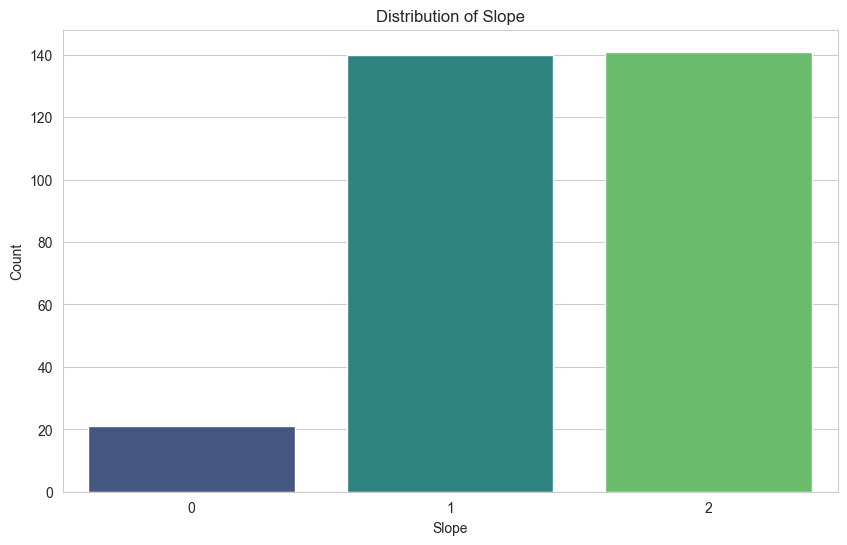

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


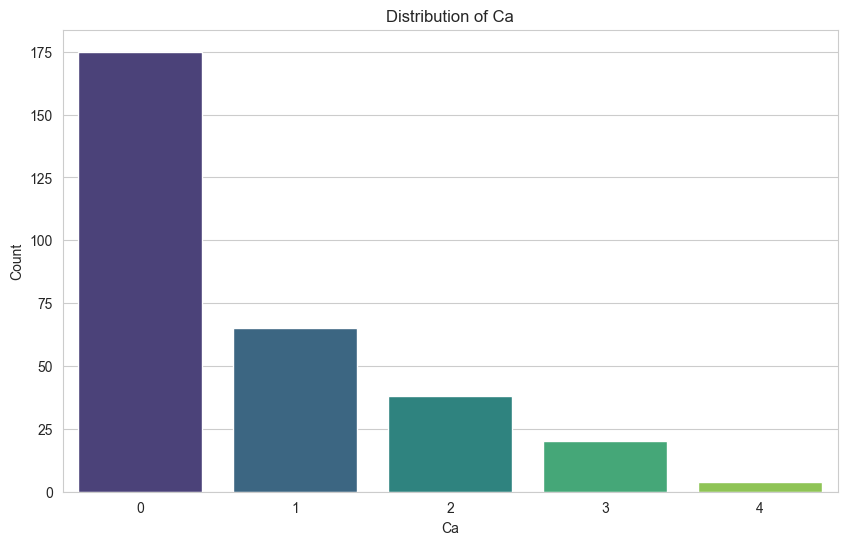

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


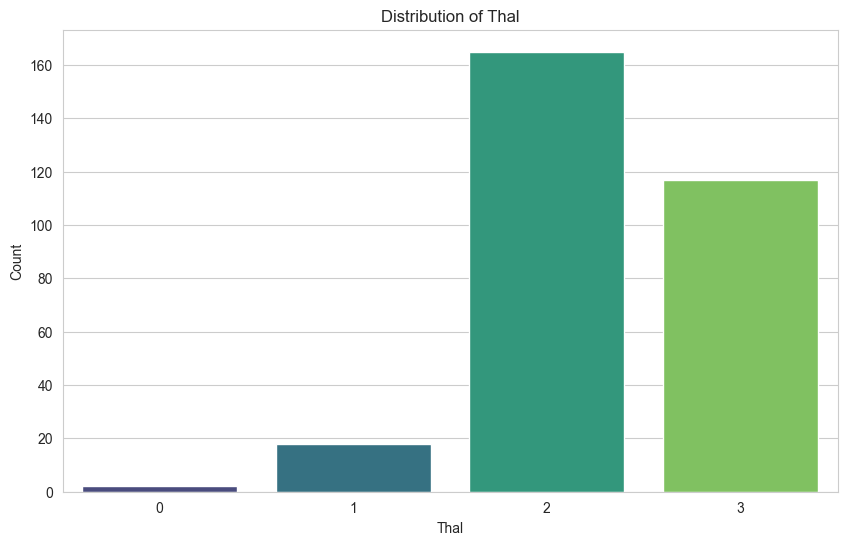

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


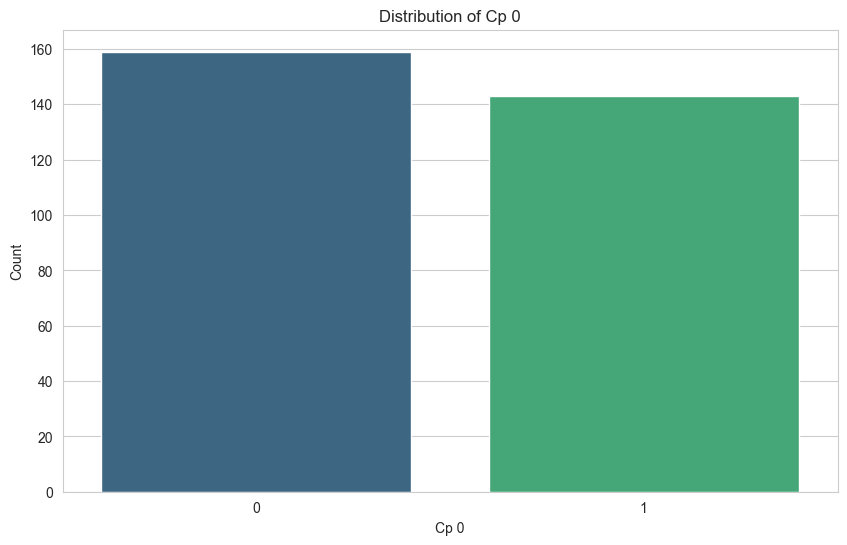

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


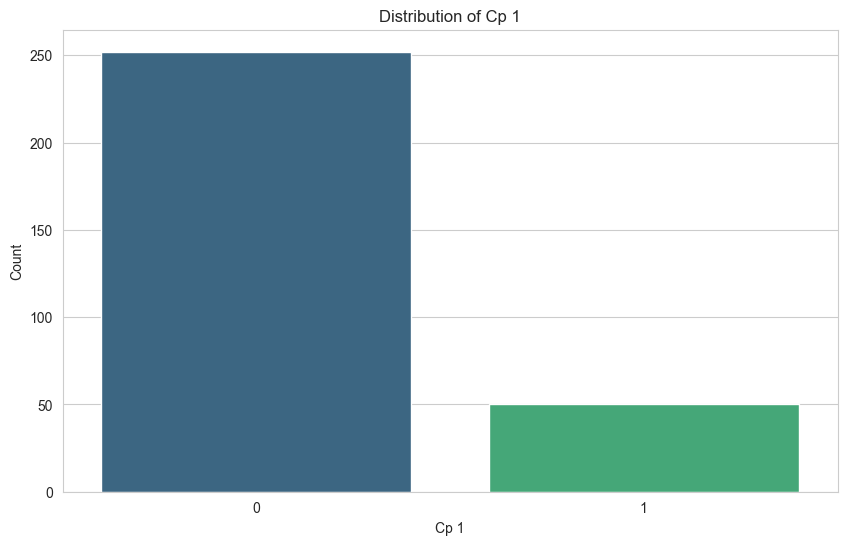

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


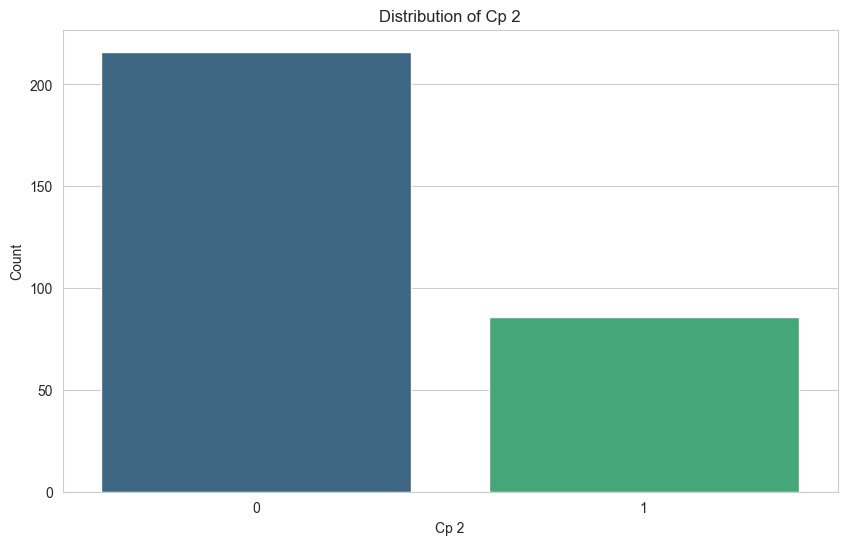

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\397863425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


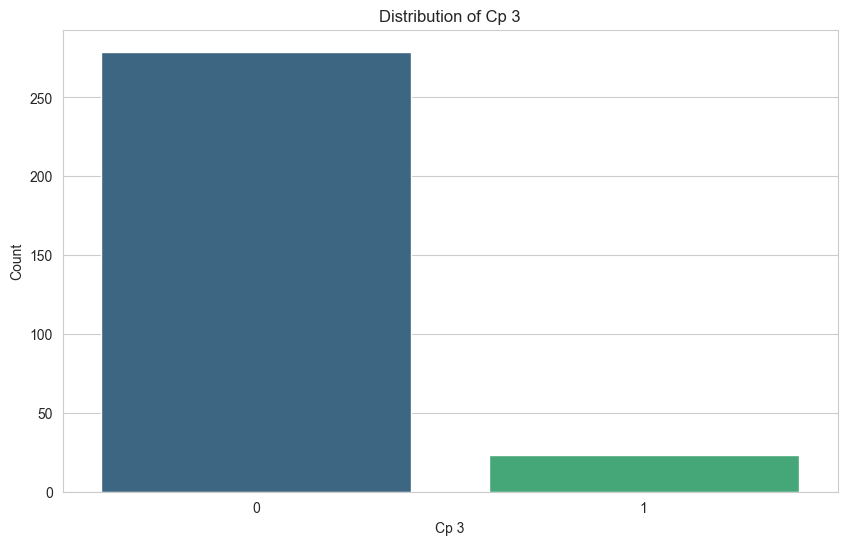

In [7]:
print("\n--- Plotting Distributions of Categorical Features ---")
for col in CATEGORICAL_COLS:
    if col in df.columns:
        plt.figure()
        # Use countplot for categorical data
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Count')
        plt.show()

# --- 3.3. Relationships between Numerical Features and Target ---


--- Plotting Relationships: Numerical Features vs. Target ---


C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')


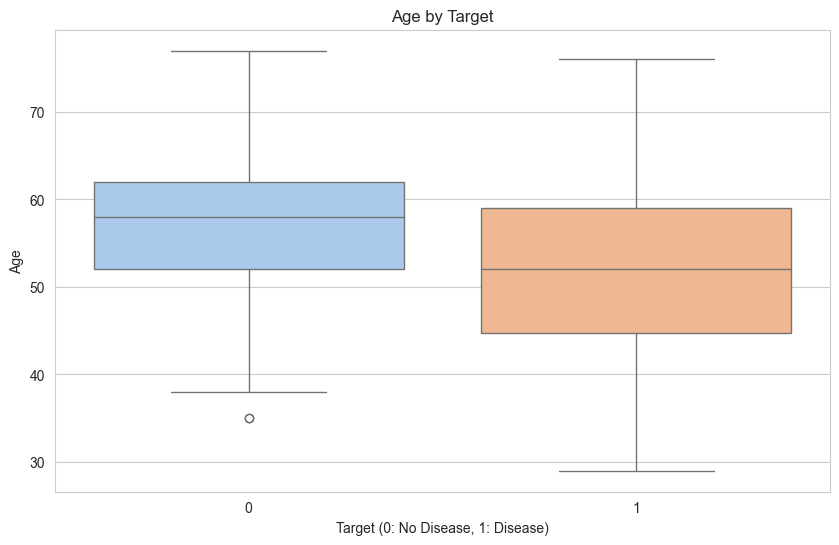

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')


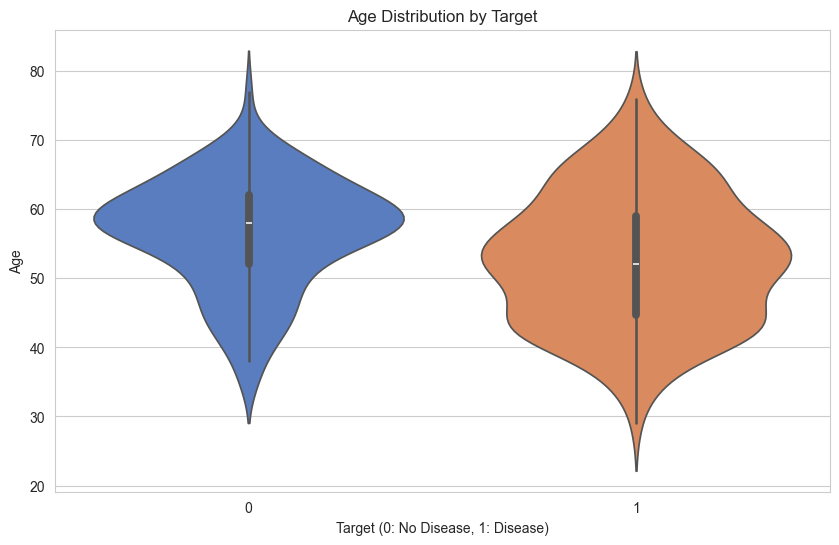

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')


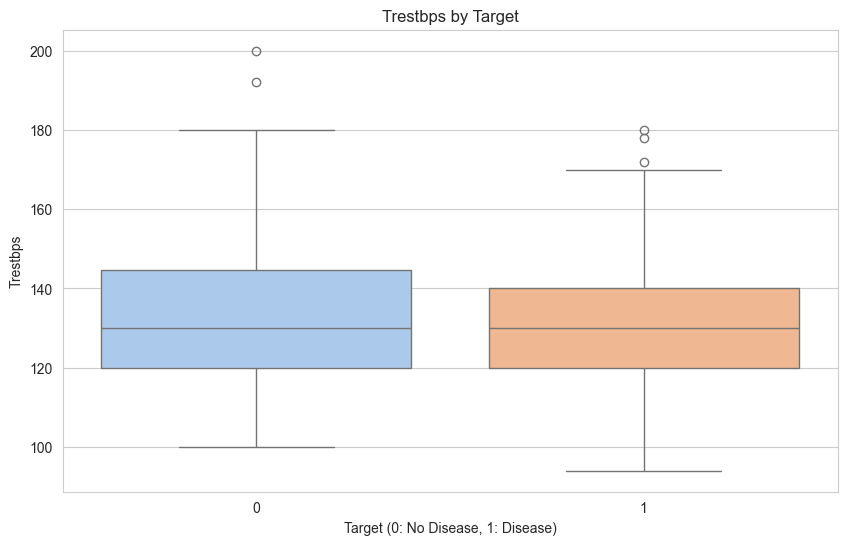

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')


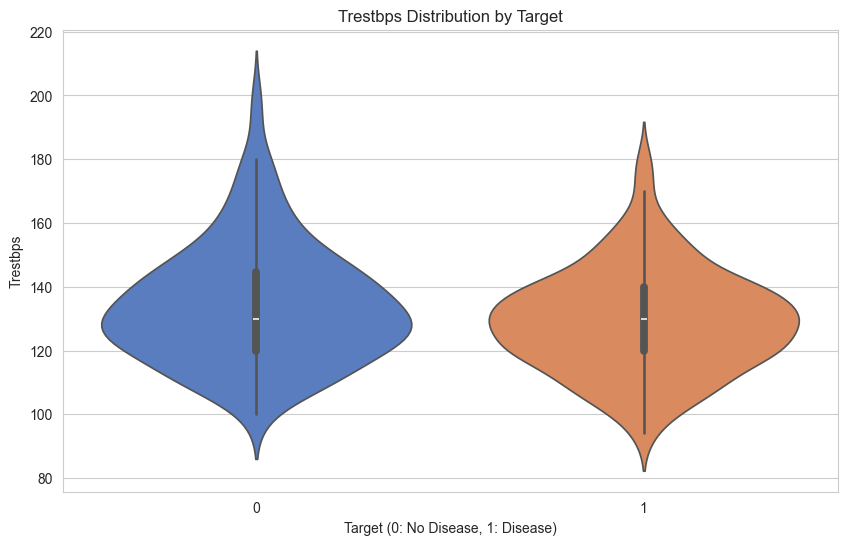

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')


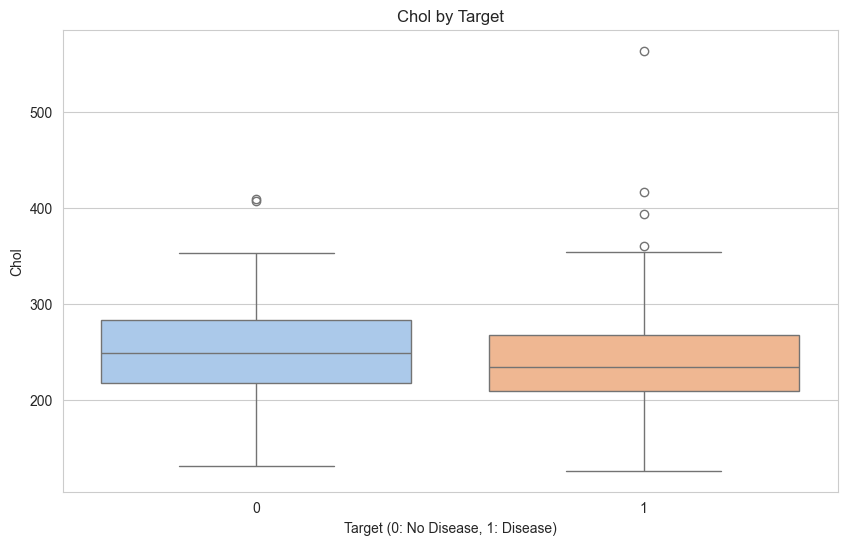

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')


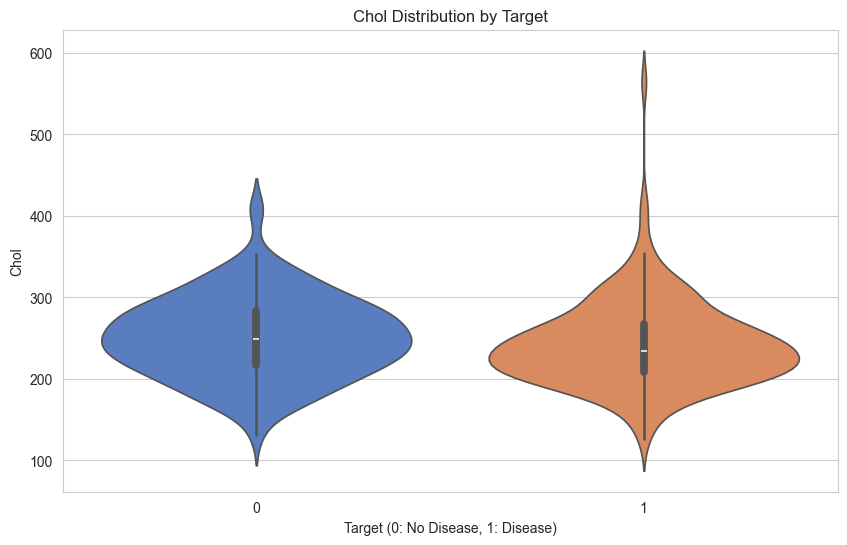

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')


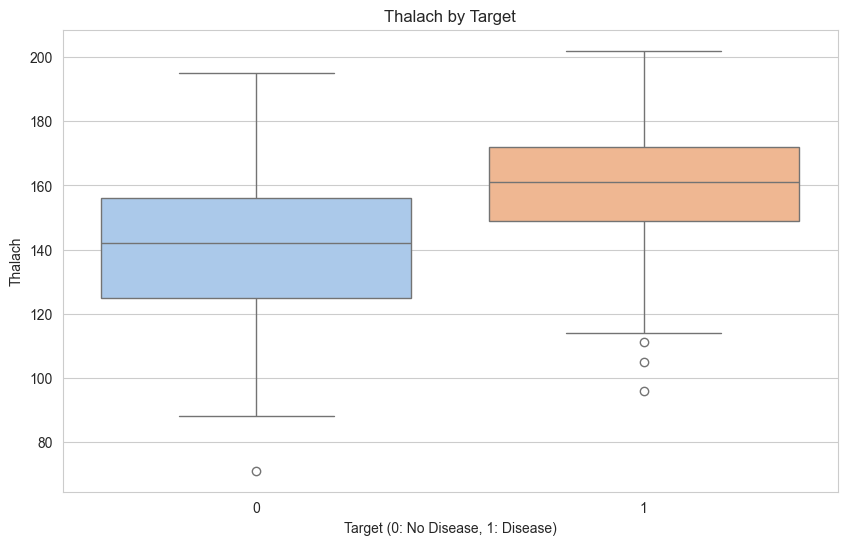

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')


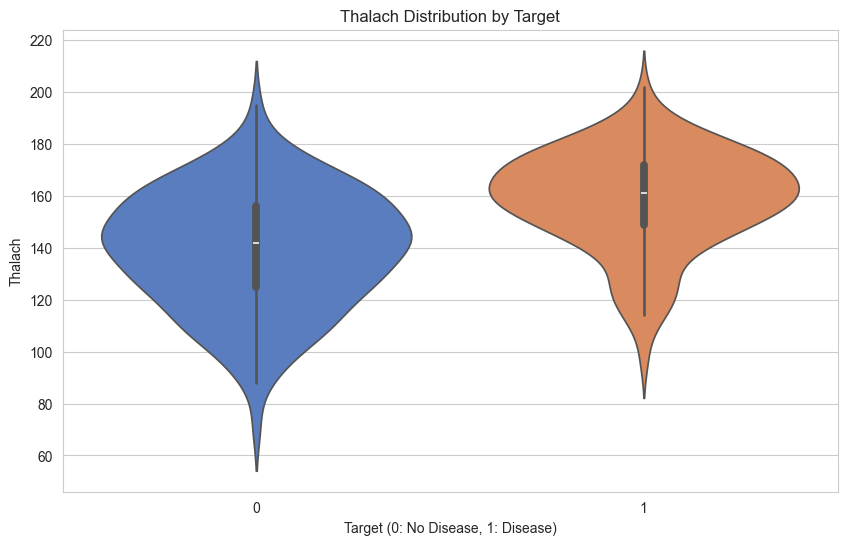

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')


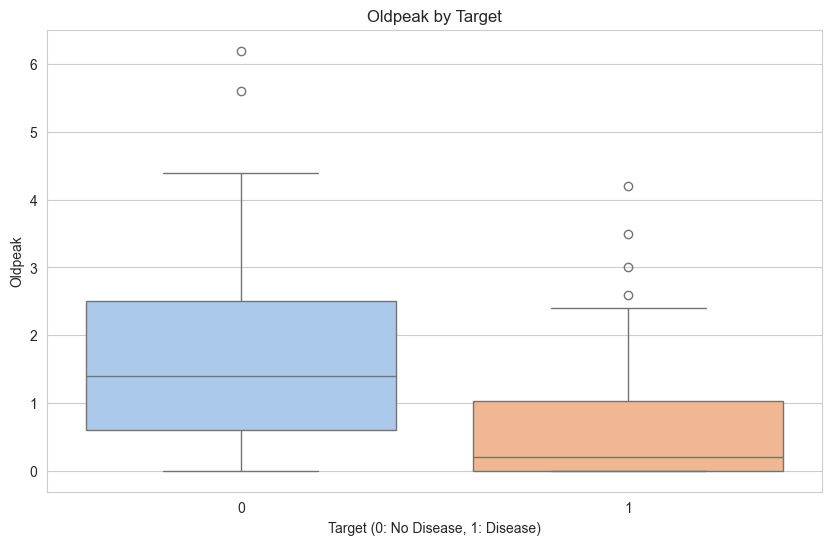

C:\Users\lualg\AppData\Local\Temp\ipykernel_26304\4292969808.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')


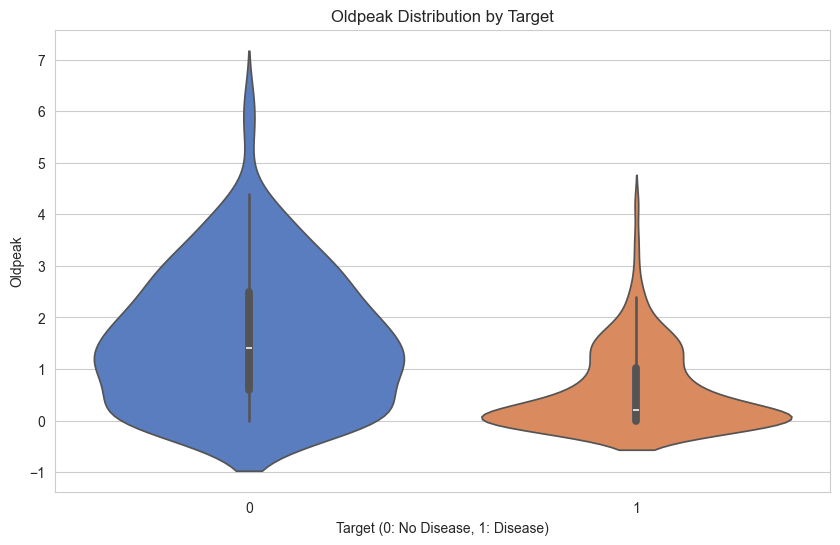

In [8]:
print("\n--- Plotting Relationships: Numerical Features vs. Target ---")
for col in NUMERICAL_COLS:
    if col in df.columns and TARGET_COL in df.columns:
        plt.figure()
        # Box plot to show distribution of numerical feature across target categories
        sns.boxplot(x=TARGET_COL, y=col, data=df, palette='pastel')
        plt.title(f'{col.replace("_", " ").title()} by {TARGET_COL.replace("_", " ").title()}')
        plt.xlabel(f'{TARGET_COL.replace("_", " ").title()} (0: No Disease, 1: Disease)')
        plt.ylabel(col.replace("_", " ").title())
        plt.show()

        # Violin plot for a richer view of distribution
        plt.figure()
        sns.violinplot(x=TARGET_COL, y=col, data=df, palette='muted')
        plt.title(f'{col.replace("_", " ").title()} Distribution by {TARGET_COL.replace("_", " ").title()}')
        plt.xlabel(f'{TARGET_COL.replace("_", " ").title()} (0: No Disease, 1: Disease)')
        plt.ylabel(col.replace("_", " ").title())
        plt.show()

# --- 3.4. Relationships between Categorical Features and Target ---


--- Plotting Relationships: Categorical Features vs. Target ---


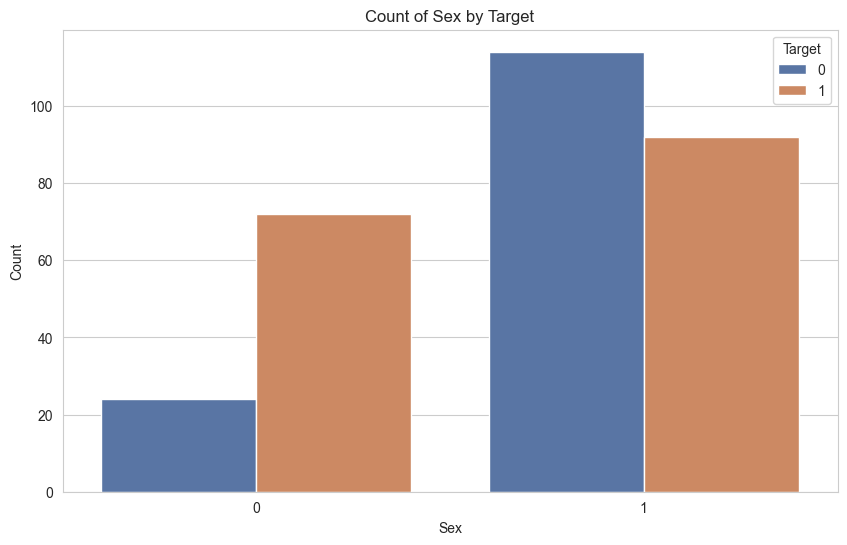

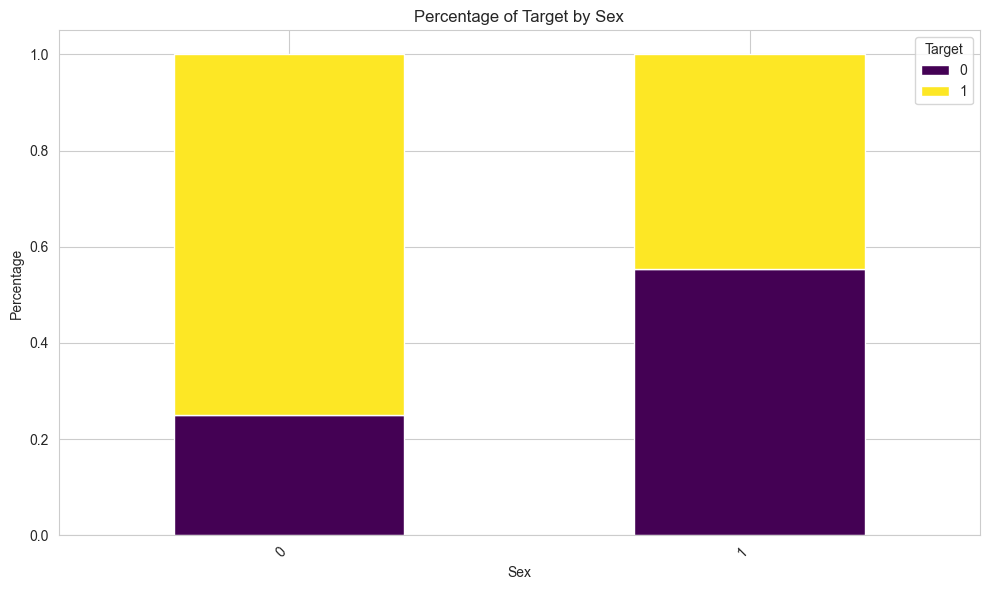

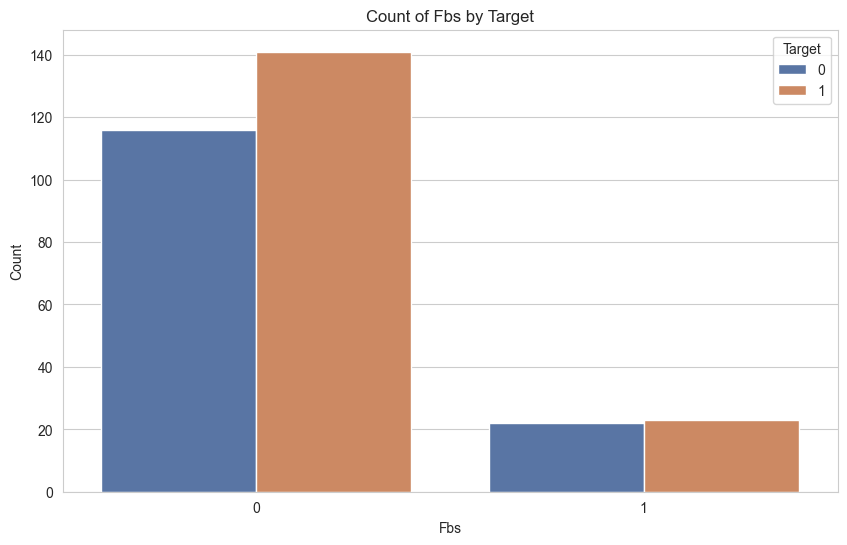

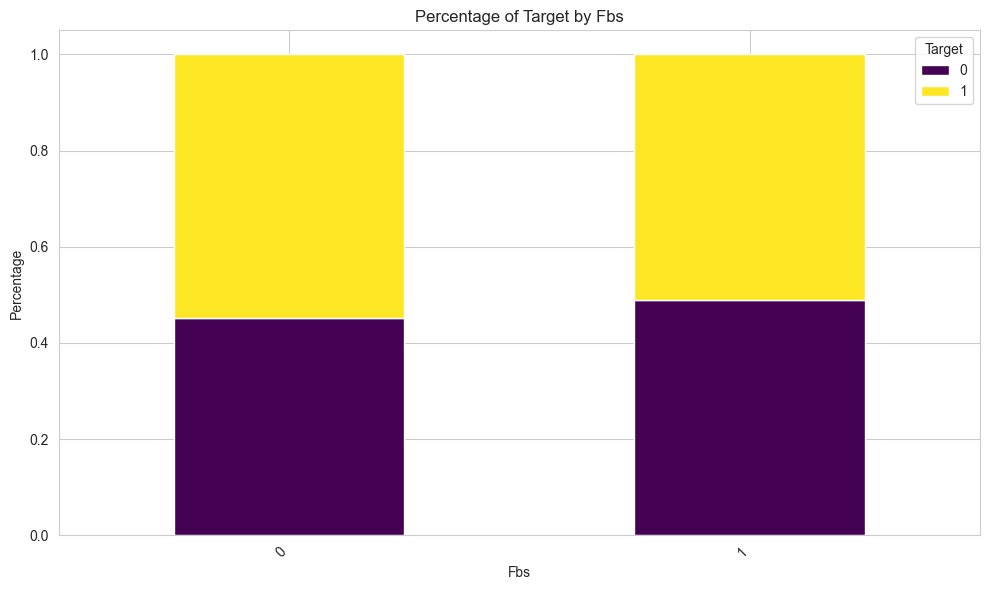

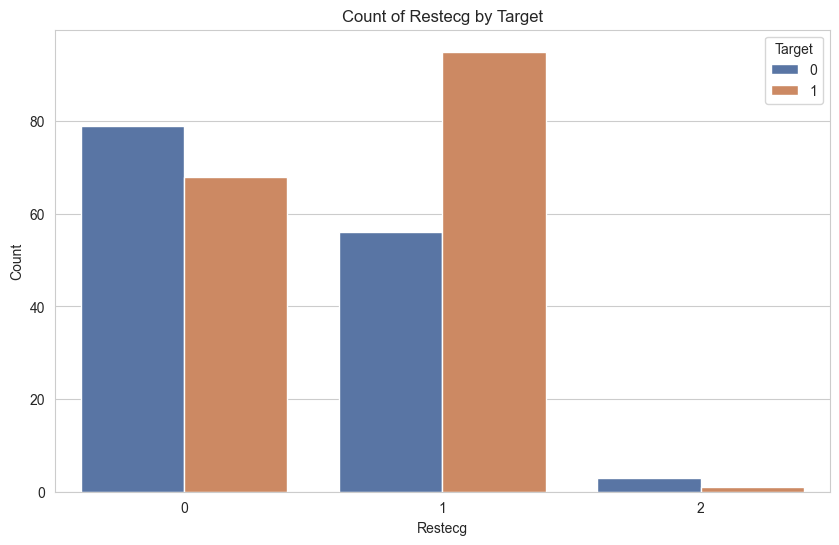

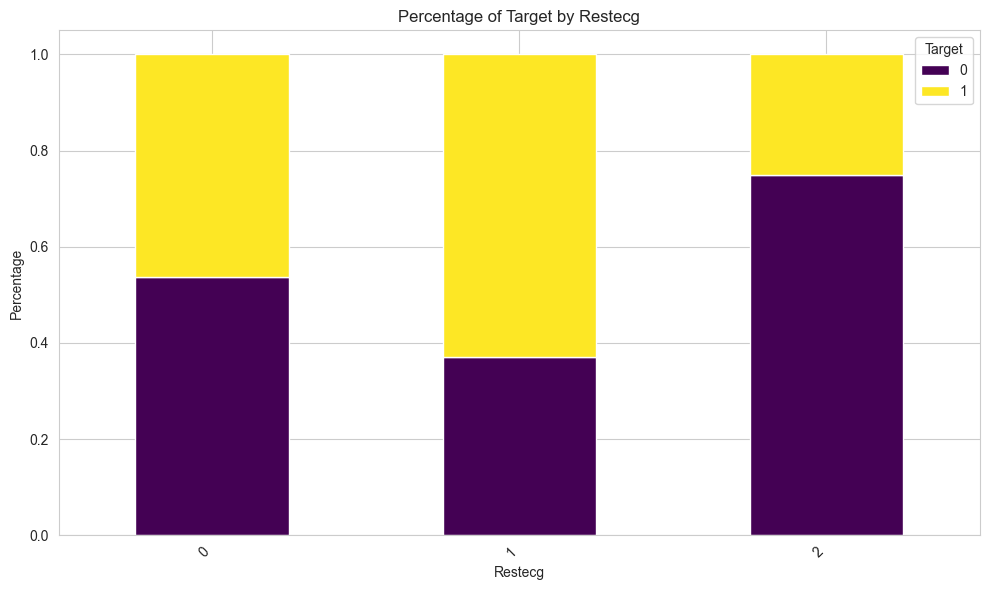

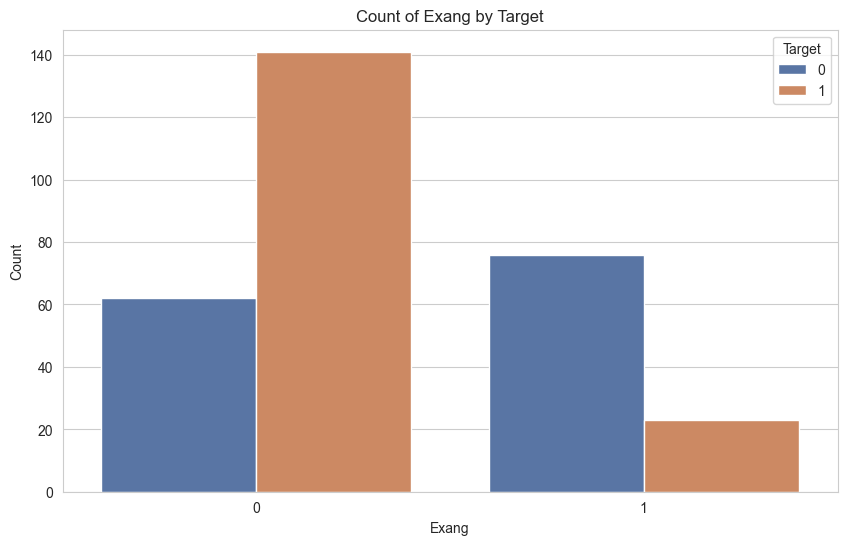

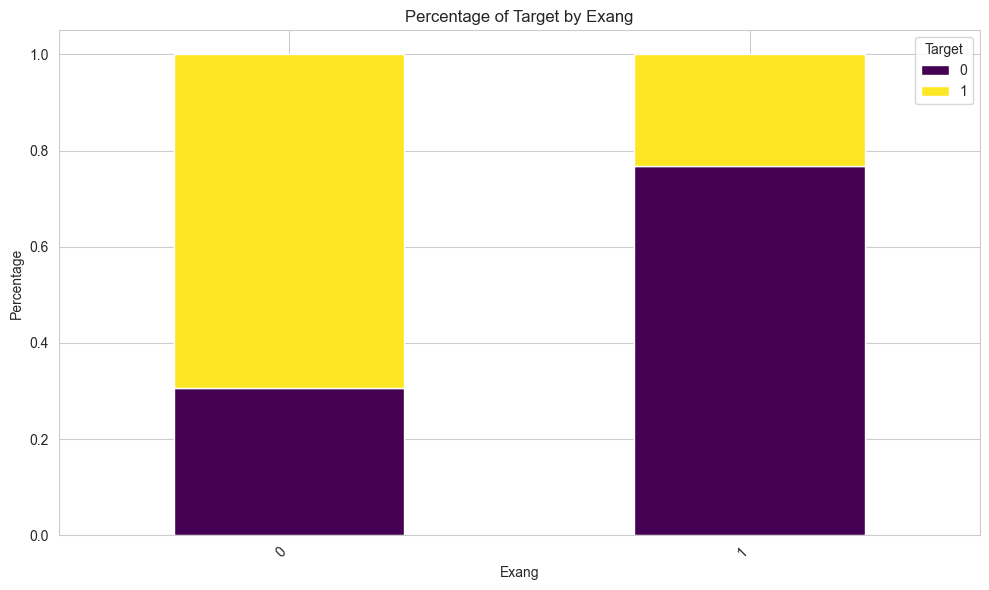

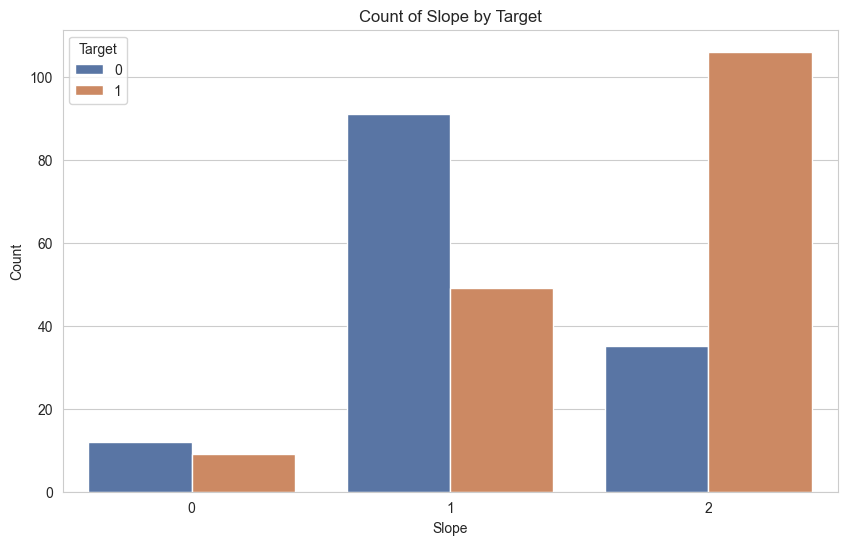

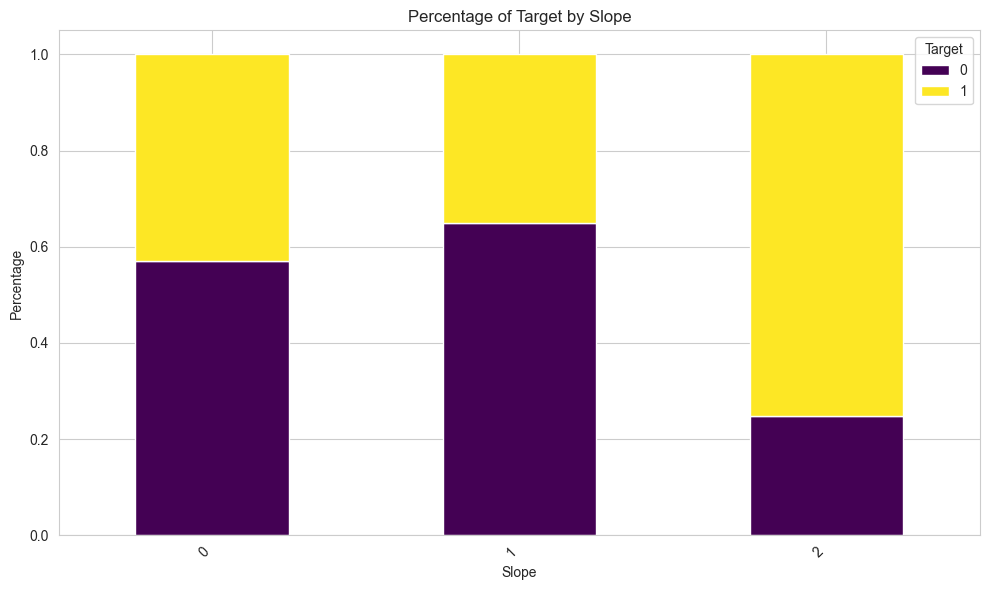

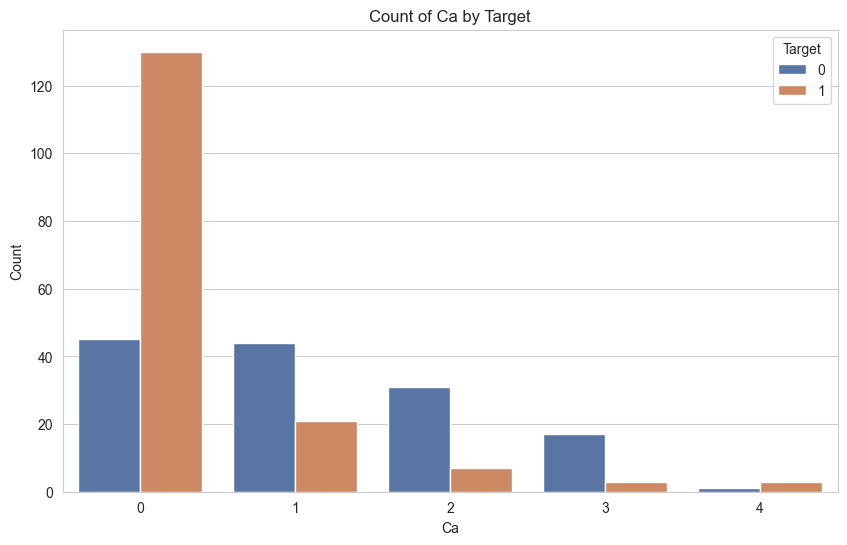

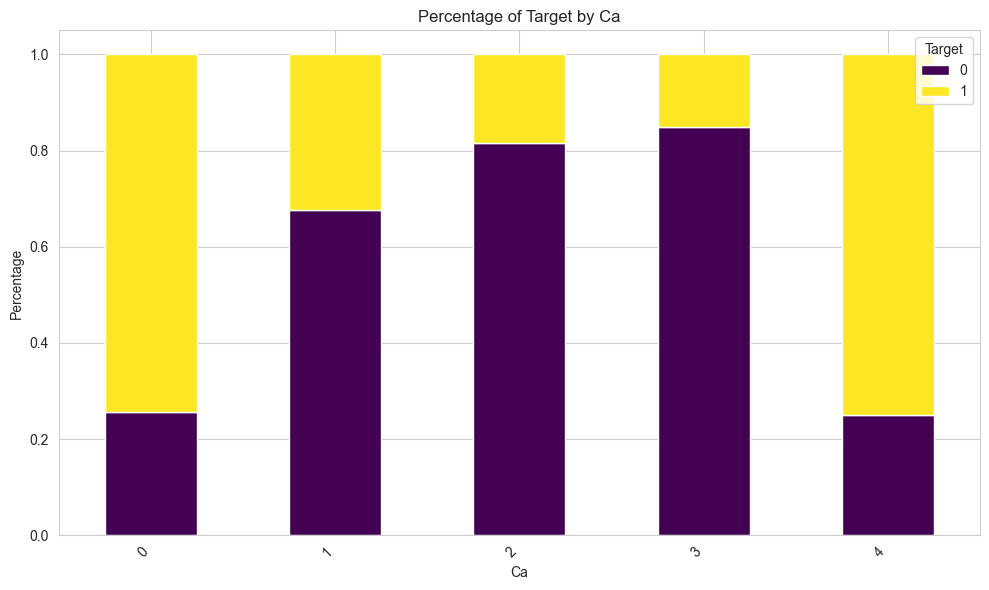

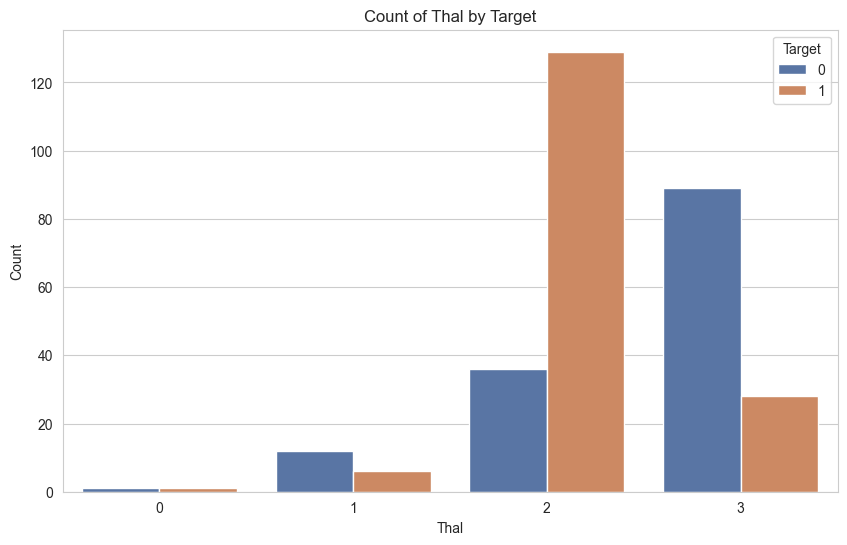

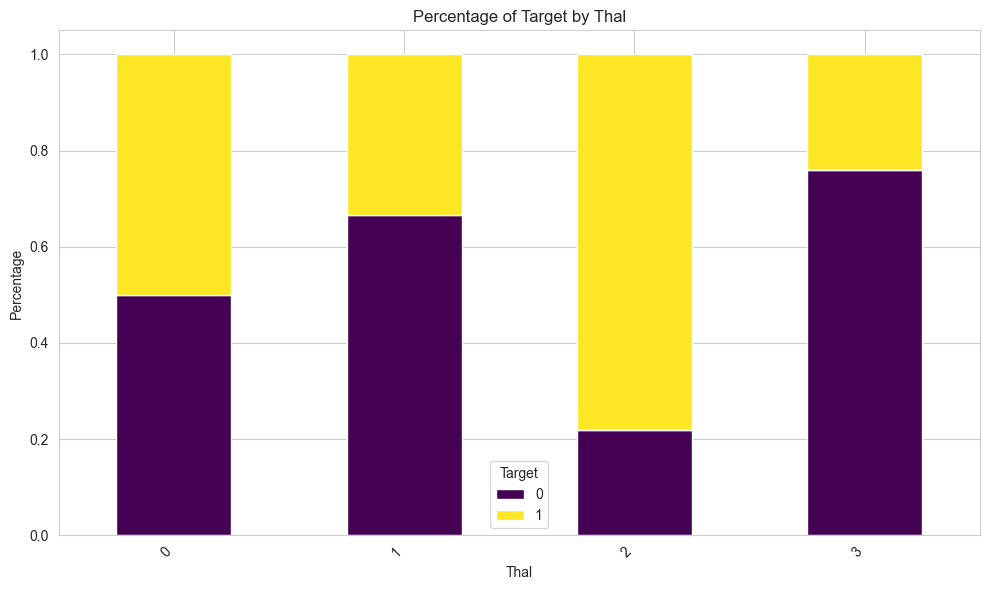

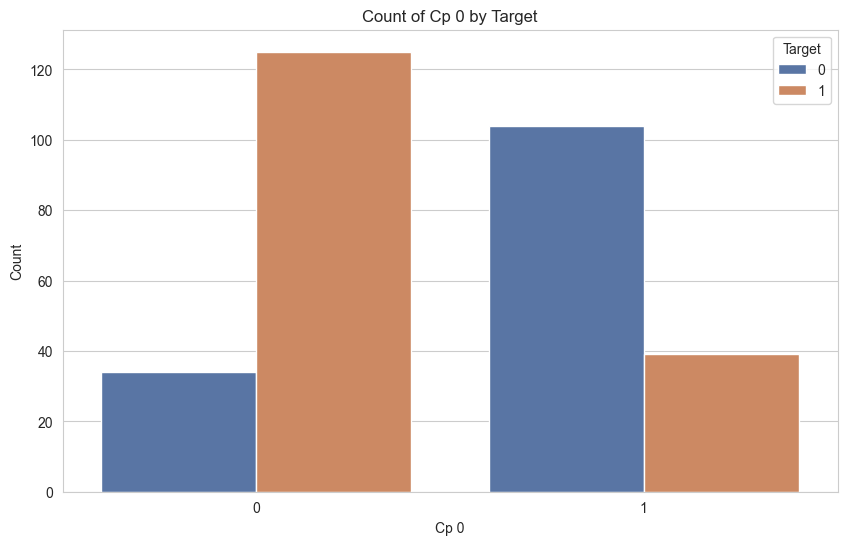

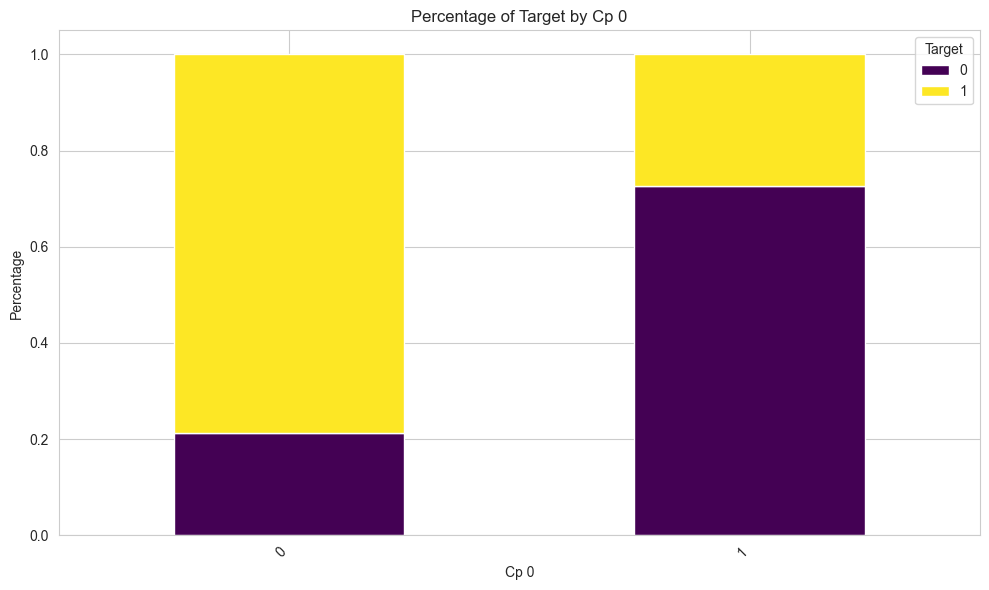

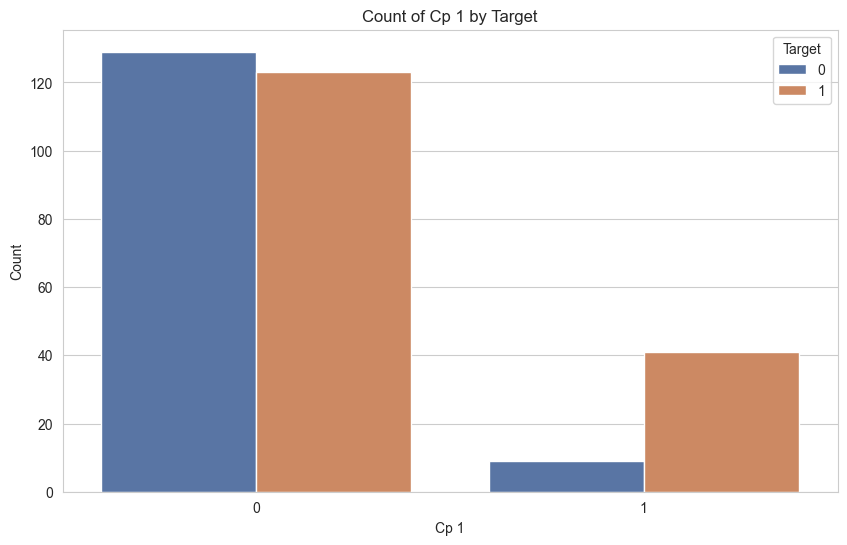

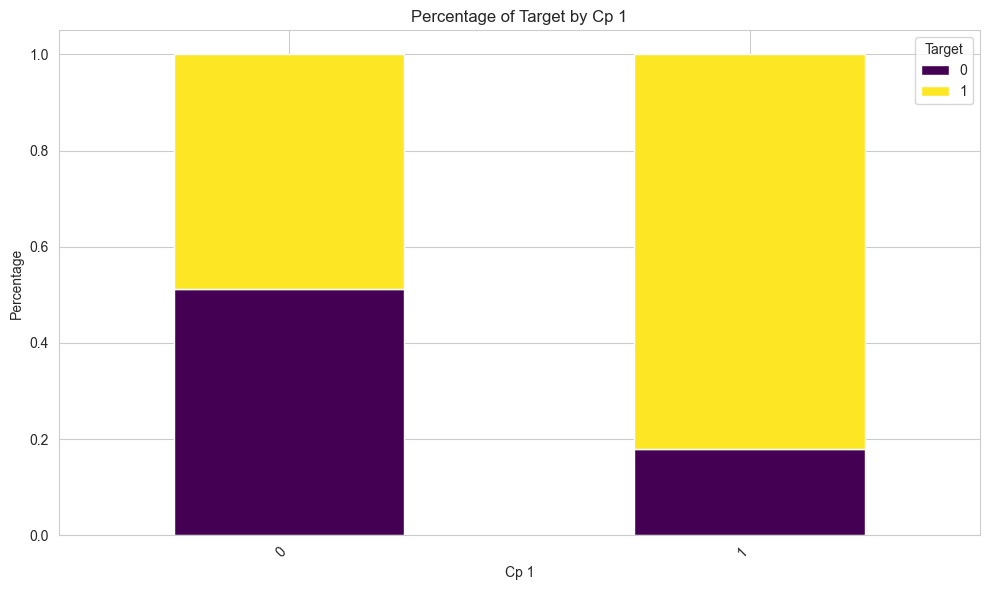

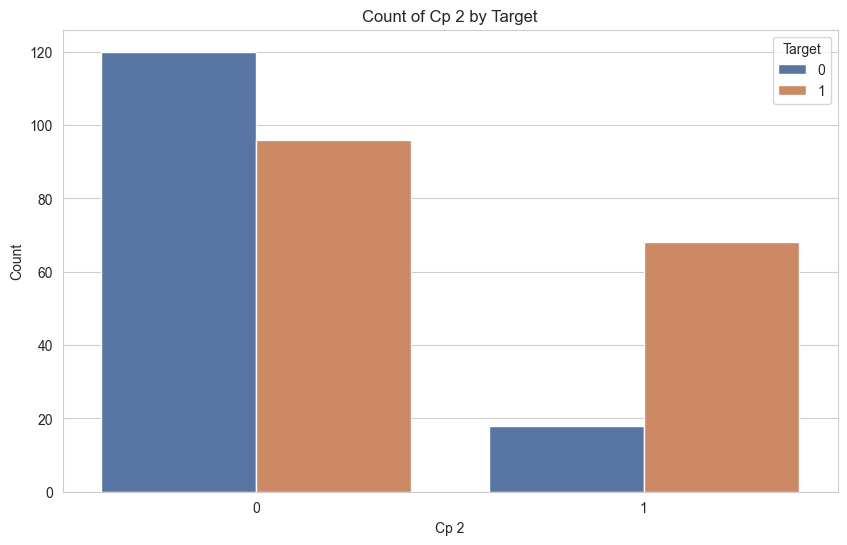

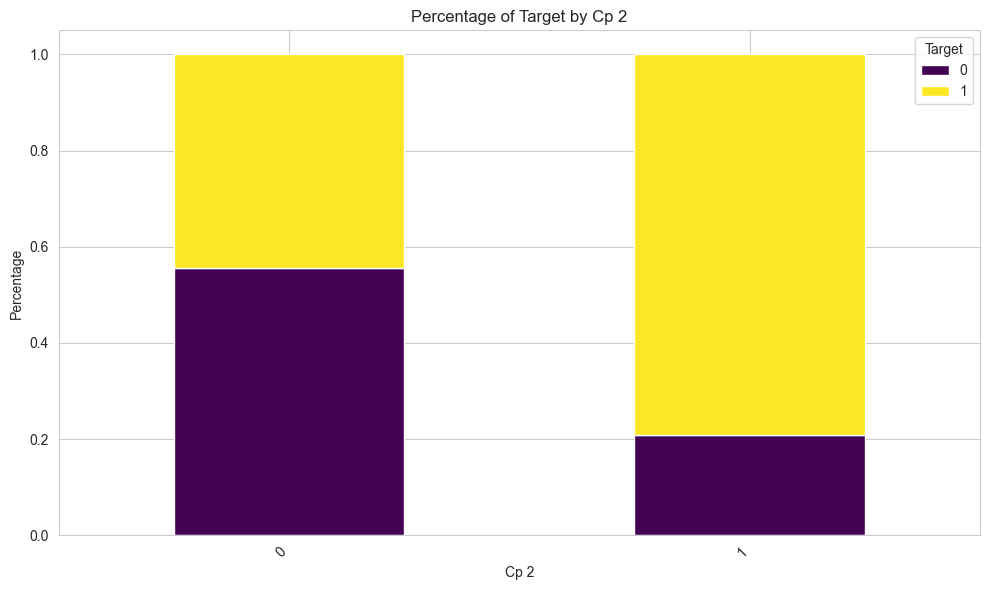

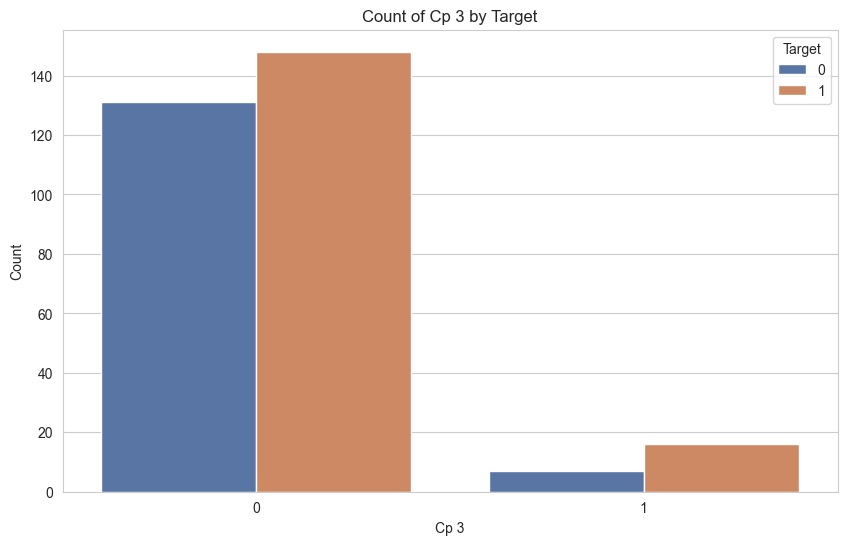

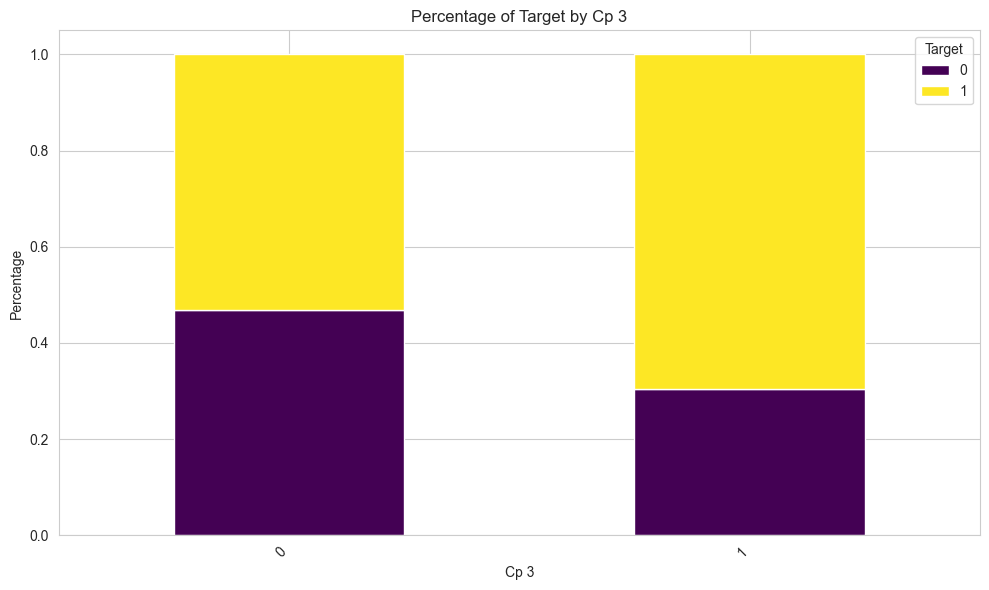

In [9]:
print("\n--- Plotting Relationships: Categorical Features vs. Target ---")
for col in CATEGORICAL_COLS:
    if col in df.columns and TARGET_COL in df.columns:
        plt.figure()
        # Countplot with hue for target variable
        sns.countplot(x=col, hue=TARGET_COL, data=df, palette='deep')
        plt.title(f'Count of {col.replace("_", " ").title()} by {TARGET_COL.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Count')
        plt.legend(title=f'{TARGET_COL.replace("_", " ").title()}')
        plt.show()

        # Another way to visualize: stacked bar chart of percentages
        # This requires creating a crosstab and then plotting
        crosstab_df = pd.crosstab(df[col], df[TARGET_COL], normalize='index')
        crosstab_df.plot(kind='bar', stacked=True, colormap='viridis')
        plt.title(f'Percentage of {TARGET_COL.replace("_", " ").title()} by {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Percentage')
        plt.legend(title=f'{TARGET_COL.replace("_", " ").title()}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# --- 3.5. Correlation Heatmap for Numerical Features ---

In [10]:
print("\n--- Plotting Correlation Heatmap for Numerical Features ---")
# Select only numerical columns for correlation
correlation_df = df[actual_numerical_cols + [TARGET_COL]].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()



--- Plotting Correlation Heatmap for Numerical Features ---


NameError: name 'actual_numerical_cols' is not defined

# --- 3.6. Pair Plot (Optional - can be slow for many features/rows) ---

In [ ]:
print("\n--- Generating Pair Plot (showing relationships between all numerical features) ---")
# This can be very useful but might take time for larger datasets or many numerical features.
sns.pairplot(df[actual_numerical_cols + [TARGET_COL]], hue=TARGET_COL, palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Target', y=1.02) # Adjust title position
plt.show()
print("Pair plot generation skipped for brevity. Uncomment code to run.")

In [ ]:
print("\nExploratory Data Analysis complete. All plots have been generated and displayed.")